# Machine Learning Models for Classification

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'DATA/OSA_DB_class.xlsx'
df = pd.read_excel(file_path)

df_class = df.drop(columns=[ 'Weight', 'Height'])

# Convert Gender into categorical
df_class['Gender'] = df_class['Gender'].astype('category')

print(df_class.dtypes)

df_class.head()


Gender      category
Age          float64
Cervical     float64
BMI          float64
OSA           object
dtype: object


,Gender,Age,Cervical,BMI,OSA
0,1,39.0,40.617735,29.053288,Severe
1,1,46.0,43.000000,29.885548,Severe
2,1,32.0,42.000000,30.193906,Healthy
3,1,39.0,42.000000,30.110991,Severe
4,1,47.0,44.000000,49.012980,Severe


[0]
Original dataset shape: Severe     134
Healthy    106
Name: OSA, dtype: int64
Resampled dataset shape: Severe     134
Healthy    134
Name: OSA, dtype: int64


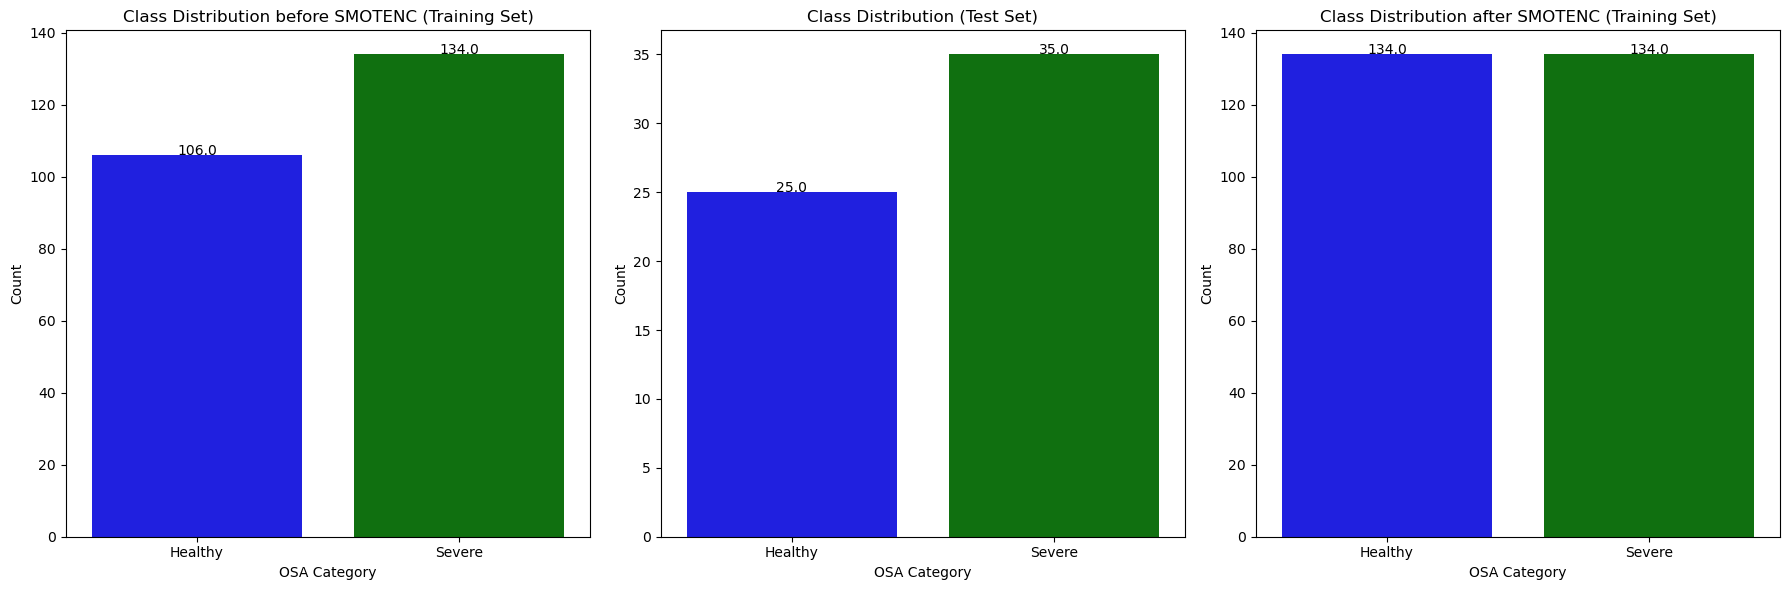

In [13]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'OSA' is the target variable
X = df_class.drop(columns=['OSA'])
y = df_class['OSA']

# Identify the indices of categorical features
categorical_features = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
print(categorical_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# Verify the resampling
print(f'Original dataset shape: {y_train.value_counts()}')
print(f'Resampled dataset shape: {y_train_resampled.value_counts()}')



# Plot the data distribution before resampling
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], x=y_train, order=['Healthy', 'Severe'], palette={'Healthy': 'blue', 'Severe': 'green'})
axes[0].set_title('Class Distribution before SMOTENC (Training Set)')
axes[0].set_xlabel('OSA Category')
axes[0].set_ylabel('Count')

# Annotate the bars with the absolute values
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

sns.countplot(ax=axes[1], x=y_test, order=['Healthy', 'Severe'], palette={'Healthy': 'blue', 'Severe': 'green'})
axes[1].set_title('Class Distribution (Test Set)')
axes[1].set_xlabel('OSA Category')
axes[1].set_ylabel('Count')
# Annotate the bars with the absolute values
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

sns.countplot(ax=axes[2], x=y_train_resampled, order=['Healthy', 'Severe'], palette={'Healthy': 'blue', 'Severe': 'green'})
axes[2].set_title('Class Distribution after SMOTENC (Training Set)')
axes[2].set_xlabel('OSA Category')
axes[2].set_ylabel('Count')
# Annotate the bars with the absolute values
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()


In [17]:
# Perform mapping
y_train_mapped = y_train.map({'Healthy': 0, 'Severe': 1})
y_train_resampled_mapped = y_train_resampled.map({'Healthy': 0, 'Severe': 1})

# Verify the mapping
print(y_train_mapped.head())
print(y_train_resampled_mapped.head())

232    1
59     1
6      0
185    1
173    1
Name: OSA, dtype: int64
0    1
1    1
2    0
3    1
4    1
Name: OSA, dtype: int64


## Logistic Regression 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  9]
 [ 8 27]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.65        25
           1       0.75      0.77      0.76        35

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60

